**This notebook is an exercise in the [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/mutual-information).**

---


# **Exercise: Mutual Information**

# Introduction #

In this exercise you'll identify an initial set of features in the [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset to develop using **_mutual information_** scores and interaction plots.

*В това упражнение ще идентифицирате първоначален набор от характеристики в базата от данни на Ames, които да разработите, като използвате резултатите на __взаимна информация__ и диаграми на взаимодействие.*

Run this cell to set everything up!

In [2]:
# Setup feedback system -> but local doesn't work
# from learntools.core import binder
# binder.bind(globals())
# from learntools.feature_engineering_new.ex2 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set seaborn style
sns.set_style("whitegrid")

# Set Matplotlib defaults
# plt.style.use("seaborn-whitegrid") -> old version and raises a Warning
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# Load data
df = pd.read_csv(r"C:\Users\dobromir\AppData\Local\Temp\Tempe371e271-0fe6-4bc9-a138-fcb58ea056a2_ames.csv.zip\ames.csv")


# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    # Convert categorical in integers
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete(categorical) features should now have integer dtypes
    global discrete_features
    global discrete_features_1
    discrete_features_1 = 7
    # Check whether the provided array or dtype is of an integer dtype.
    # Returns boolean
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    print(discrete_features) # my test
    
    # Create a MI instance
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    # print(f"mi_scores 1.value: {mi_scores}")  -> comment after run Cell[6]
    
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [3]:
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
                  ...   
MoSold             int64
YearSold           int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 79, dtype: object

-------------------------------------------------------------------------------

To start, let's review the meaning of mutual information by looking at a few features from the *Ames* dataset.

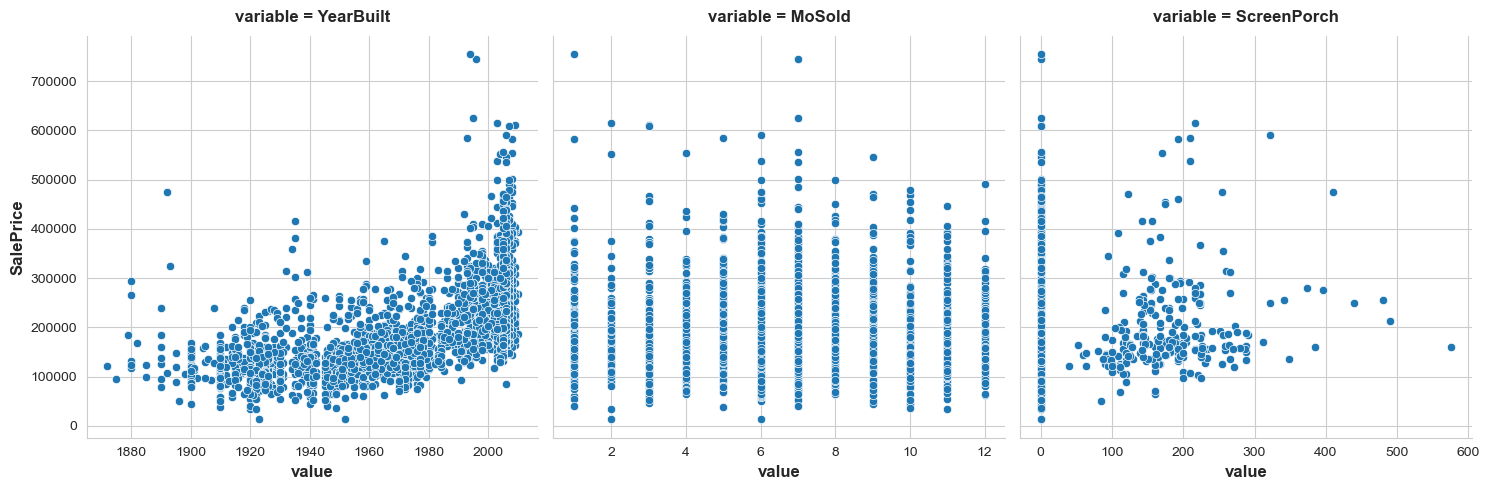

In [4]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

# 1) Understand Mutual Information

Based on the plots, which feature do you think would have the highest mutual information with `SalePrice`?

In [ ]:
# View the solution (Run this cell to receive credit!)
q_1.check()

-------------------------------------------------------------------------------

The *Ames* dataset has seventy-eight features -- a lot to work with all at once! Fortunately, you can identify the features with the most potential.

Use the `make_mi_scores` function (introduced in the tutorial) to compute mutual information scores for the *Ames* features:


In [6]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

[True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, False, False, True, True, True, False, True, True, True, True]
mi_scores 1.value: [2.87131257e-01 1.25505852e-01 2.33333788e-01 1.66457536e-01
 3.38076910e-03 2.16964741e-02 7.10729795e-02 2.44512087e-02
 2.90883480e-04 1.36373404e-02 0.00000000e+00 5.69812775e-01
 3.47919203e-02 3.17629517e-03 5.06712013e-02 7.97185154e-02
 5.81262336e-01 1.24346464e-01 4.37938575e-01 3.15401852e-01
 3.62677838e-02 2.61950081e-03 1.68774650e-01 1.74786345e-01
 1.15364336e-01 1.69407615e-01 3.22389848e-01 2.09340770e-02
 2.36114918e-01 3.64778716e-01 5.12076152e-02 1.00871274e-01
 1.90

Now examine the scores using the functions in this cell. Look especially at top and bottom ranks.

*Сега разгледайте резултатите,използвайки функциите в тази клетка. Погледнете особено най-високите и долните.*

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64
ExterCond           0.020934
KitchenAbvGr        0.017677
BsmtHalfBath        0.013719
LotConfig           0.013637
ScreenPorch         0.012981
PoolArea            0.012831
MiscVal             0.010997
LowQualFinSF        0.009328
Heating             0.007622
Functional          0.006380
MiscFeature         0.004322
Street              0.003381
Condition2          0.003176
RoofMatl            0.002620
PoolQC              0.001370
Utilities           0.000291
Thre

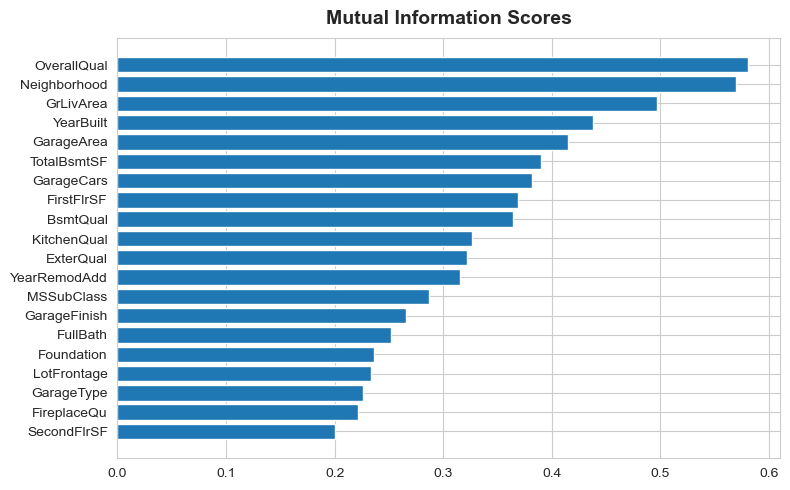

In [8]:
print(mi_scores.head(20))
print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

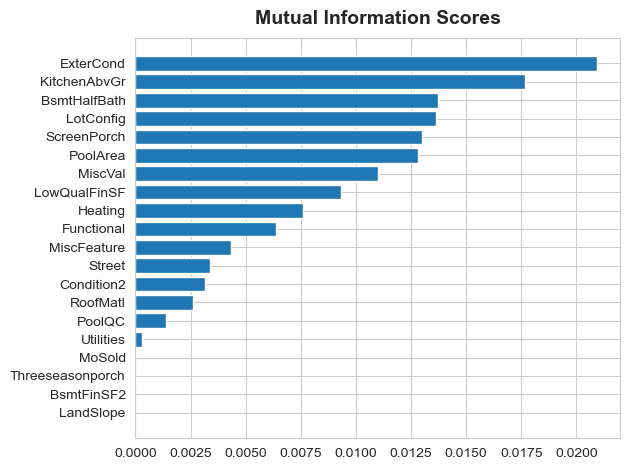

In [9]:
# Bottom 20 see the "x" scale
plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

# 2) Examine MI Scores

Do the scores seem reasonable? Do the high scoring features represent things you'd think most people would value in a home? Do you notice any themes in what they describe? 

*Резултатите изглеждат ли разумни? Характеристиките с висок резултат представляват ли неща, които смятате, че повечето хора биха оценили в дома? Забелязвате ли някакви теми в това, което описват?*

In [18]:
# View the solution (Run this cell to receive credit!)
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Some common themes among most of these features are:
- Location: `Neighborhood`
- Size: all of the `Area` and `SF` features, and counts like `FullBath` and `GarageCars`
- Quality: all of the `Qual` features
- Year: `YearBuilt` and `YearRemodAdd`
- Types: descriptions of features and styles like `Foundation` and `GarageType`

These are all the kinds of features you'll commonly see in real-estate listings (like on Zillow), It's good then that our mutual information metric scored them highly. On the other hand, the lowest ranked features seem to mostly represent things that are rare or exceptional in some way, and so wouldn't be relevant to the average home buyer.


-------------------------------------------------------------------------------

In this step you'll investigate possible interaction effects for the `BldgType` feature. This feature describes the broad structure of the dwelling in five categories:

*В тази стъпка ще проучите възможните ефекти на взаимодействие за функцията BldgType. Тази характеристика описва широката структура на жилището в пет категории:*

> Bldg Type (Nominal): Type of dwelling
>		
>       1Fam	Single-family Detached	
>       2FmCon	Two-family Conversion; originally built as one-family dwelling
>       Duplx	Duplex
>       TwnhsE	Townhouse End Unit
>       TwnhsI	Townhouse Inside Unit

The `BldgType` feature didn't get a very high MI score. A plot confirms that the categories in `BldgType` don't do a good job of distinguishing values in `SalePrice` (the distributions look fairly similar, in other words):

*Функцията „BldgType“ не получи много висок резултат от MI. Диаграма потвърждава, че категориите в `BldgType` не вършат добра работа за разграничаване на стойности в `SalePrice` (разпределенията изглеждат доста сходни, с други думи):*

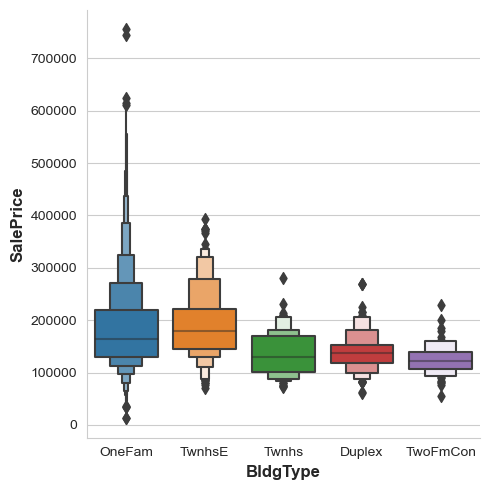

In [10]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

Still, the type of a dwelling seems like it should be important information. Investigate whether `BldgType` produces a significant interaction with either of the following:

```
GrLivArea  # Above ground living area
MoSold     # Month sold
```

Run the following cell twice, the first time with `feature = "GrLivArea"` and the next time with `feature="MoSold"`:

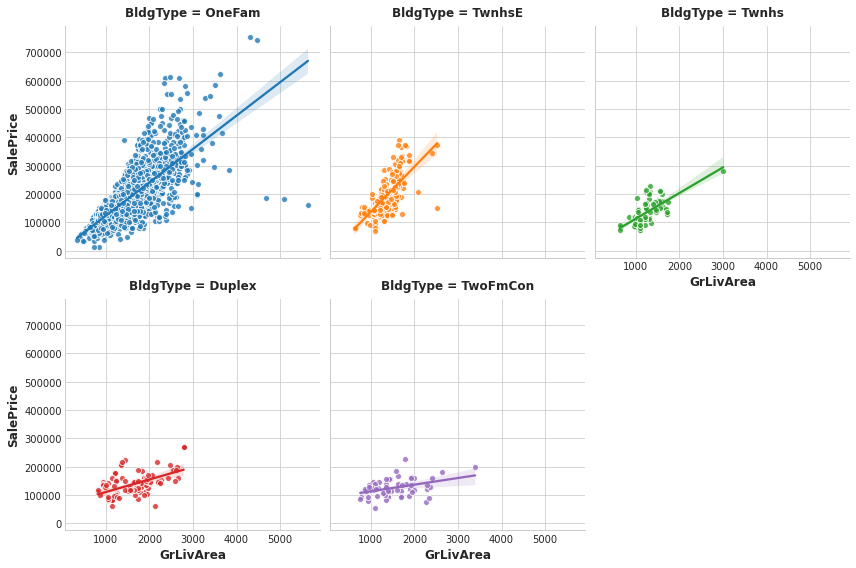

In [19]:
# YOUR CODE HERE: 
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

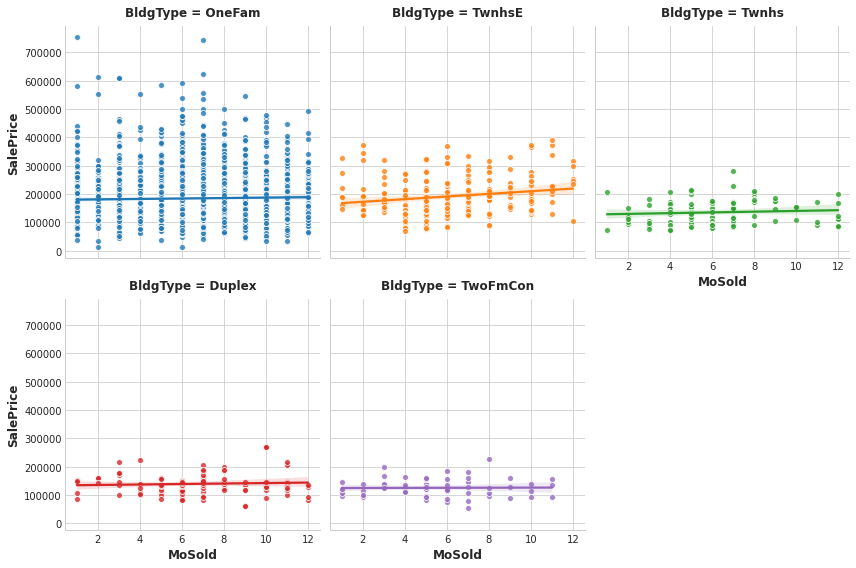

In [20]:
# my
feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

The trend lines being significantly different from one category to the next indicates an interaction effect.

*Линиите на тренда, които се различават значително от една категория до друга, показват ефект на взаимодействие.*

# 3) Discover Interactions

From the plots, does `BldgType` seem to exhibit an interaction effect with either `GrLivArea` or `MoSold`?

*От графиките изглежда, че `BldgType` проявява ефект на взаимодействие с `GrLivArea` или `MoSold`?*

In [21]:
# View the solution (Run this cell to receive credit!)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The trends lines within each category of `BldgType` are clearly very different, indicating an interaction between these features. Since knowing `BldgType` tells us more about how `GrLivArea` relates to `SalePrice`, we should consider including `BldgType` in our feature set.

The trend lines for `MoSold`, however, are almost all the same. This feature hasn't become more informative for knowing `BldgType`.

*Линиите на тренда във всяка категория на `BldgType` очевидно са много различни, което показва взаимодействие между тези характеристики. Тъй като познаването на `BldgType` ни казва повече за това, как `GrLivArea`се отнася към `SalePrice`, трябва да обмислим включването на `BldgType` в нашия набор от функции !!!*

*Линиите на тенденцията за `MoSold` обаче са почти всички еднакви. Тази функция не е станала по-информативна за познаване на `BldgType`.*

# A First Set of Development Features #

Let's take a moment to make a list of features we might focus on. In the exercise in Lesson 3, you'll start to build up a more informative feature set through combinations of the original features you identified as having high potential.

*Нека отделим малко време и направим списък с характеристики, върху които можем да се съсредоточим. В упражнението след Урок 3 ще започнете да изграждате по-информативен набор от характеристики чрез комбинации от оригиналните характеристики, които сте идентифицирали като имащи висок потенциал.(виж по-горе `BldgType`)*

You found that the ten features with the highest MI scores were:

In [22]:
mi_scores.head(10)

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
Name: MI Scores, dtype: float64

Do you recognize the themes here? Location, size, and quality. You needn't restrict development to only these top features, but you do now have a good place to start. Combining these top features with other related features, especially those you've identified as creating interactions, is a good strategy for coming up with a highly informative set of features to train your model on.

*Разпознавате ли темите тук? Местоположение, размер и качество. Не е необходимо да ограничавате разработката само до тези топ характеристики, но вече имате добро място да започнете. Комбинирането на тези най-добри характеристики с други, особено тези, които сте идентифицирали като създаване на взаимодействия, е добра стратегия за създаване на високо информативен набор от характеристики, чрез които да обучите вашия модел.*

# Keep Going #

[**Start creating features**](https://www.kaggle.com/ryanholbrook/creating-features) and learn what kinds of transformations different models are most likely to benefit from.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*